In [1]:
import pandas, numpy
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge,SGDClassifier,Lasso, ElasticNet,ElasticNetCV,SGDRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
def Transform(X):
    
    transformed = np.hstack((
    X.copy(),#Linear
    X.copy()**2,#Quadratic
    np.exp(X.copy()),#Exponential
    np.cos(X.copy()),#Cosin
    np.ones((np.shape(X.copy())[0],1))#Constant
    ))
    
    return transformed

In [3]:
TrainingData = pandas.read_csv("train.csv", dtype="double")
print(TrainingData)

        Id         y    x1    x2    x3    x4    x5
0      0.0 -6.822679  0.02  0.05 -0.09 -0.43 -0.08
1      1.0 -6.326290 -0.13  0.11 -0.08 -0.29 -0.03
2      2.0 -9.302728  0.08  0.06 -0.07 -0.41 -0.03
3      3.0 -7.371893  0.02 -0.12  0.01 -0.43 -0.02
4      4.0 -6.027647 -0.14 -0.12 -0.08 -0.02 -0.08
..     ...       ...   ...   ...   ...   ...   ...
695  695.0 -6.147394  0.31 -0.09  0.04 -0.09  0.03
696  696.0 -6.214899 -0.26 -0.01  0.02 -0.40  0.05
697  697.0 -6.841341 -0.27 -0.22 -0.01 -0.32 -0.05
698  698.0 -6.523371  0.19  0.11 -0.05 -0.27 -0.04
699  699.0 -5.676683 -0.09 -0.09 -0.06 -0.41 -0.06

[700 rows x 7 columns]


In [4]:
train_y = TrainingData['y']
train_x = TrainingData.drop(columns=['y','Id'])

In [5]:
new_x = Transform(train_x)
print(new_x[0])

[ 2.00000000e-02  5.00000000e-02 -9.00000000e-02 -4.30000000e-01
 -8.00000000e-02  4.00000000e-04  2.50000000e-03  8.10000000e-03
  1.84900000e-01  6.40000000e-03  1.02020134e+00  1.05127110e+00
  9.13931185e-01  6.50509095e-01  9.23116346e-01  9.99800007e-01
  9.98750260e-01  9.95952733e-01  9.08965750e-01  9.96801706e-01
  1.00000000e+00]


# Create Test and train dataset 

In [6]:
weights = numpy.ones((21, 1))
x_trans, X_test, Y, Y_test = train_test_split(new_x, train_y, shuffle=False)

In [7]:
alpha_space = np.linspace(0.01, 200, 21)
err_list = []
ridge_weight_list = []

In [8]:
for alpha in alpha_space:
    r = Ridge(alpha=alpha, fit_intercept=False)
    r.fit(x_trans, Y)
    y_predic = r.predict(X=X_test)
    
    ridge_weight_list.append(r.coef_)
    
    err = np.sqrt(mean_squared_error(Y_test, y_predic))
    err_list.append(err)

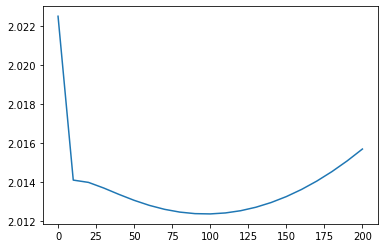

In [9]:
plt.figure()
plt.plot(alpha_space, err_list)
plt.show()

In [10]:
# Select the weights with minimum mean_squared_error
idx = np.argmin(err_list)
print(alpha_space[idx])
weightsRidge = ridge_weight_list[idx]

100.00500000000001


In [11]:
clf = SGDRegressor(max_iter=100000, tol=1e-4,loss = "squared_loss",shuffle=False)
sol = clf.fit(new_x,train_y)
weightssgd = (clf.coef_)
print(weightssgd)

[ 0.10933685 -0.34844814 -0.47665237  0.23157521  0.07581848 -0.11386437
  0.07804848  0.08381794 -0.12337118  0.02422881 -0.45807798 -0.8208734
 -0.94788547 -0.33493469 -0.424251   -0.45242661 -0.54777386 -0.55064236
 -0.44853598 -0.52052968 -0.50899846]


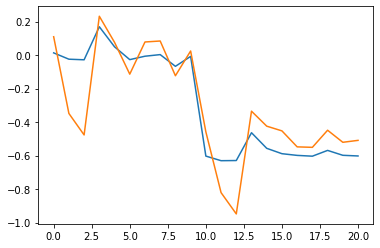

In [12]:
plt.plot(weightsRidge)
plt.plot(weightssgd)

In [13]:
np.savetxt("results.csv", weightsRidge, delimiter="\n")